In [6]:

%matplotlib inline
import os
import numpy as np
from astropy.table import Table, Column, vstack, join
import matplotlib.pyplot as plt

from matplotlib import rcParams
import matplotlib.ticker as mticker
import corner

In [23]:
plt.rc('image', origin='lower',
       interpolation='none')
plt.rc('font', family='sans-serif')
plt.rc('xtick.major', size=4, pad=7)
plt.rc('xtick', labelsize=10)
plt.rc('ytick.major', size=4, pad=7)
plt.rc('ytick', labelsize=10)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=12)
plt.rc('legend',**{'fontsize':12})
plt.rc('savefig', bbox='tight')
plt.rc('figure.subplot', wspace=0.5)
plt.rc('figure.subplot', hspace=0.5)
plt.rc('legend', fancybox=True, borderaxespad=0.)

In [7]:
parentdir = os.path.abspath("..")

In [95]:
fname = os.path.join(parentdir, 'data', 'tut_data',
                     'tru_cat_mock_out.fits')
cat1 = Table.read(fname, format='fits')


fname = os.path.join(parentdir,'data', 'tut_data', 'mock_gal_pairs.fits' )
cat2 = Table.read(fname, format='fits')
cat2.add_column(cat2['galtileid'], rename_duplicate=True)
cat2.rename_column('galtileid_1', 'db_id' )


tru_cat = join(cat1, cat2, keys='db_id', table_names=['in', 'out'])

fname = os.path.join(parentdir, 'data', 'tut_data',
                     'det_cat_mock_out_noise_trimmed.fits')
det_cat = Table.read(fname, format='fits')

In [91]:
q, = np.where((tru_cat['Detected']== 1) & (tru_cat['ambig_blend'] == 0) )
print "Detected and not ambig blended: {0:.1f}% ".format(len(q)/float(len(tru_cat))*100)
q, = np.where((tru_cat['Detected']== 1) & (tru_cat['ambig_blend'] == 1) )
print "Detected and ambig blended: {0:.1f}% ".format(len(q)/float(len(tru_cat))*100)
q, = np.where((tru_cat['Detected']== 0) & (tru_cat['ambig_blend'] == 1) )
print "UnDetected and ambig blended: {0:.1f}% ".format(len(q)/float(len(tru_cat))*100)
q, = np.where((tru_cat['Detected']== 0) & (tru_cat['ambig_blend'] == 0) )
print "UnDetected and not ambig blended: {0:.1f}% ".format(len(q)/float(len(tru_cat))*100)

Detected and not ambig blended: 66.7% 
Detected and ambig blended: 16.7% 
UnDetected and ambig blended: 16.7% 
UnDetected and not ambig blended: 0.0% 


In [73]:
print "Observed Mean shape from dm output:", np.mean(det_cat['ext_shapeHSM_HsmShapeRegauss_e1']), np.mean(det_cat['ext_shapeHSM_HsmShapeRegauss_e2'])
print "True Mean shape of detected galaxies :", np.mean(in_cat['e1']), np.mean(in_cat['e2'])
print "True mean shape of all galaxies :",np.mean(tru_cat['e1']), np.mean(tru_cat['e2']) 

Observed Mean shape from dm output: 0.10813023876 0.00400619934274
True Mean shape of detected galaxies : -0.0137998213371 -0.00189944108327
True mean shape of all galaxies : 0.0100000252326 0.0100000301997


In [112]:
print "Extent of overlap = ratio of sum of psf convolved galaxy sigma to distance between centers"
selec = tru_cat[(tru_cat['extent']==4) & (tru_cat['Detected']==1)]
e1 = det_cat['ext_shapeHSM_HsmShapeRegauss_e1'][selec['Primary_Detection']]
e2 = det_cat['ext_shapeHSM_HsmShapeRegauss_e2'][selec['Primary_Detection']]
print"Mean noise bias of galaxy shapes with 4*extent overlap: ", np.mean(selec['bias_g1_grp']), np.mean(selec['bias_g2_grp'])
print "Observed mean of galaxy shapes with 4*extent overlap: ", np.mean(e1), np.mean(e2)


selec = tru_cat[(tru_cat['extent']==2) & (tru_cat['Detected']==1)]
e1 = det_cat['ext_shapeHSM_HsmShapeRegauss_e1'][selec['Primary_Detection']]
e2 = det_cat['ext_shapeHSM_HsmShapeRegauss_e2'][selec['Primary_Detection']]
print "Observed mean of galaxy shapes with 2*extent overlap: ", np.mean(e1), np.mean(e2)
print"Mean noise bias of galaxy shapes with 2*extent overlap: ", np.mean(selec['bias_g1_grp']), np.mean(selec['bias_g2_grp'])



Extent of overlap = ratio of sum of psf convolved galaxy sigma to distance between centers
Mean noise bias of galaxy shapes with 4*extent overlap:  0.000152865890414 0.000169696674372
Observed mean of galaxy shapes with 4*extent overlap:  -0.0270330656009 0.0169715579201
Observed mean of galaxy shapes with 2*extent overlap:  -0.00221069096006 -0.00389558868483
Mean noise bias of galaxy shapes with 2*extent overlap:  -0.000322827758888 0.00019584580635


In [107]:
selec = tru_cat[(tru_cat['extent']==4) & (tru_cat['Detected']==1)]
e1 = det_cat['ext_shapeHSM_HsmShapeRegauss_e1'][selec['Primary_Detection']]
e2 = det_cat['ext_shapeHSM_HsmShapeRegauss_e2'][selec['Primary_Detection']]
print"Mean noise bias of galaxy shapes with 4*extent overlap: ", np.mean(selec['bias_g1_grp']), np.mean(selec['bias_g2_grp'])
print "Observed mean of galaxy shapes with 4*extent overlap: ", np.mean(e1), np.mean(e2)

Mean noise bias of galaxy shapes with 4*extent overlap:  0.000152865890414 0.000169696674372
Observed mean of galaxy shapes with 4*extent overlap:  -0.0270330656009 0.0169715579201


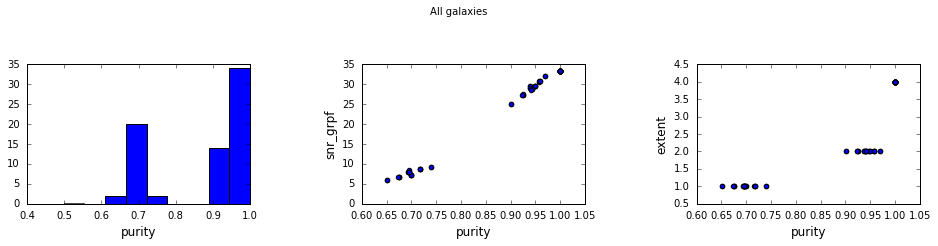

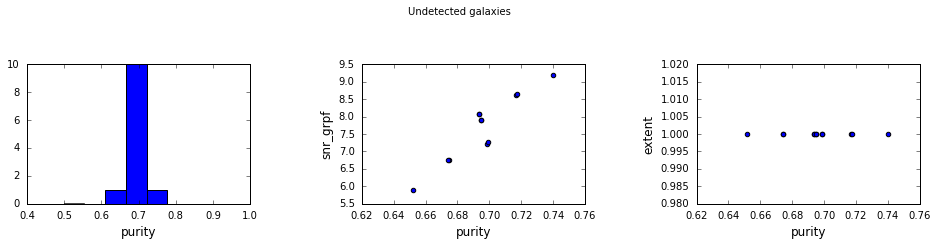

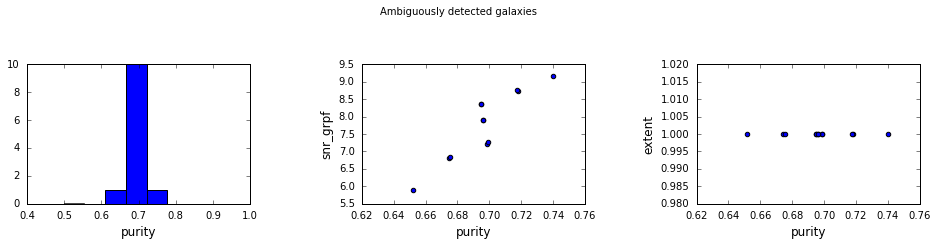

In [41]:
# WL deb output
plt.figure(figsize=[16,10])
plt.subplot(3, 3, 1)
plt.hist(tru_cat['purity'], np.linspace(0.5,1,10))
plt.xlabel('purity')

plt.subplot(3, 3, 2)
plt.scatter(tru_cat['purity'], tru_cat['snr_grpf'])
plt.xlabel('purity')
plt.ylabel('snr_grpf')

plt.subplot(3, 3, 3)
plt.scatter(tru_cat['purity'], tru_cat['extent'])
plt.xlabel('purity')
plt.ylabel('extent')
plt.suptitle('All galaxies')

undet= tru_cat[tru_cat['Detected'] ==0]
plt.figure(figsize=[16,10])
plt.subplot(3, 3, 1)
plt.hist(undet['purity'], np.linspace(0.5,1,10))
plt.xlabel('purity')

plt.subplot(3, 3, 2)
plt.scatter(undet['purity'], undet['snr_grpf'])
plt.xlabel('purity')
plt.ylabel('snr_grpf')

plt.subplot(3, 3, 3)
plt.scatter(undet['purity'], undet['extent'])
plt.xlabel('purity')
plt.ylabel('extent')
plt.suptitle('Undetected galaxies')

ambig= tru_cat[(tru_cat['Detected'] ==1) & (tru_cat['ambig_blend'] ==1)]
plt.figure(figsize=[16,10])
plt.subplot(3, 3, 1)
plt.hist(ambig['purity'], np.linspace(0.5,1,10))
plt.xlabel('purity')

plt.subplot(3, 3, 2)
plt.scatter(ambig['purity'], ambig['snr_grpf'])
plt.xlabel('purity')
plt.ylabel('snr_grpf')

plt.subplot(3, 3, 3)
plt.scatter(ambig['purity'], ambig['extent'])
plt.xlabel('purity')
plt.ylabel('extent')
plt.suptitle('Ambiguously detected galaxies')

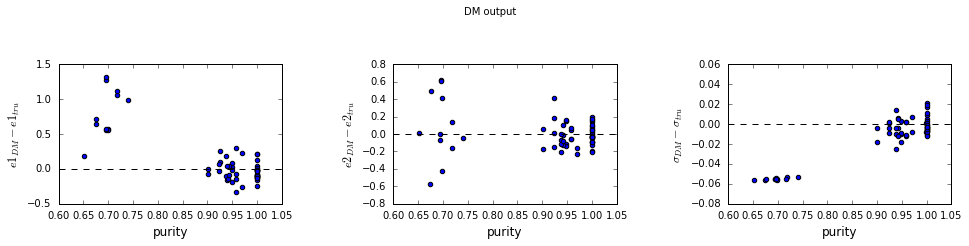

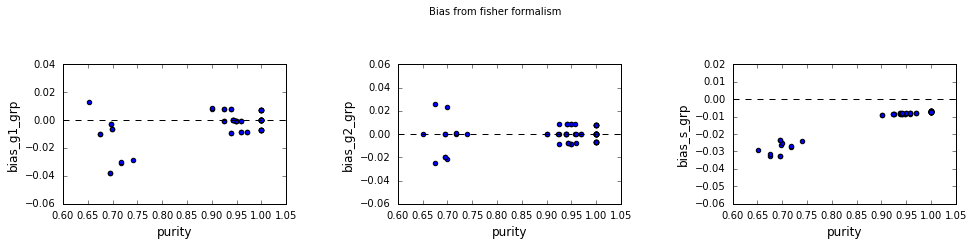

In [78]:
# DM output
in_cat = tru_cat[det_cat['Primary_Detection']] 
plt.figure(figsize=[16,10])
plt.subplot(3, 3, 1)
plt.scatter(in_cat['purity'], det_cat['ext_shapeHSM_HsmShapeRegauss_e1']-in_cat['hsm_e1'])
plt.xlabel('purity')
plt.ylabel(r'$e1_{DM}-e1_{tru}$')
plt.axhline(0, linestyle='--', c='k')

plt.subplot(3, 3, 2)
plt.scatter(in_cat['purity'], det_cat['ext_shapeHSM_HsmShapeRegauss_e2']-in_cat['hsm_e2'])
plt.xlabel('purity')
plt.ylabel(r'$e2_{DM}-e2_{tru}$')
plt.axhline(0, linestyle='--', c='k')

plt.subplot(3, 3, 3)
plt.scatter(in_cat['purity'], det_cat['ext_shapeHSM_HsmShapeRegauss_sigma'] - in_cat['hsm_sigm']*0.2)
plt.axhline(0, linestyle='--', c='k')
plt.xlabel('purity')
plt.ylabel(r'$\sigma_{DM} - \sigma_{tru}$')

plt.suptitle('DM output')


plt.figure(figsize=[16,10])
plt.subplot(3, 3, 1)
plt.scatter(in_cat['purity'], in_cat['bias_g1_grp'])
plt.xlabel('purity')
plt.ylabel(r'bias_g1_grp')
plt.axhline(0, linestyle='--', c='k')
plt.subplot(3, 3, 2)
plt.scatter(in_cat['purity'], in_cat['bias_g2_grp'])
plt.xlabel('purity')
plt.ylabel(r'bias_g2_grp')
plt.axhline(0, linestyle='--', c='k')
plt.subplot(3, 3, 3)
plt.scatter(in_cat['purity'], in_cat['bias_s_grp'])
plt.xlabel('purity')
plt.ylabel(r'bias_s_grp')
plt.axhline(0, linestyle='--', c='k')
plt.suptitle('Bias from fisher formalism')